The aim is to generate 256x256 images of the C. elegans embryo using a conditional-GAN, lets explore the dataset first. 

The dataset is scraped from the [EPIC Dataset](https://epic.gs.washington.edu/index.html)

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!cp /content/drive/"My Drive"/data/mini_clean_training_data.csv /content/

In [4]:
df = pd.read_csv("/content/mini_clean_training_data.csv")
df = df.sample(frac=1)
df.head()

,Unnamed: 0,filenames,A,E,M,P,C,D,Z
1657,1043,frames/20080305_c50f7_5_7/259.jpg,126,8,18,1,13,4,2
1318,25090,frames/20090309_F39B2_1_7_L1/173.jpg,128,8,21,1,15,4,2
404,30062,frames/20090701_tbx-11_RW10249_L1/86.jpg,32,4,8,0,4,2,0
1968,12983,frames/20070801_hnd-1_F396/182.jpg,64,7,16,1,8,4,0
1708,1094,frames/20080305_c50f7_5_7/310.jpg,129,8,32,1,16,5,2


## What do the columns represent?
1. Column *filenames* contain paths to images.
2. Columns *A, E, M, P, C, D, Z* contain integers representing the number of cells belonging to each cell family for the corresponding image in the same row.

## The Correlation Plot:
The plot below represents how interdependent each column is. Some conclusions that we can derive are:

* The values in columns *A, E, M, P, C, D* are highly interdependent.
* The values in column *Z* are relatively less dependent on the other columns.

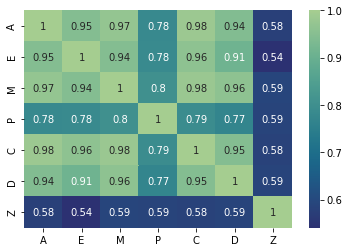

In [5]:
sns.heatmap(df[cols].corr(), 
            annot=True, 
            cmap='crest_r')

## Scaling the columns:

* You may have noticed that the values in the columns A,E,M,P,C,D,Z vary wildly, with each column having a different range of values. 
* This need to be fixed, all values that we pass through the neural-net(s) should be scaled between 0 and 1. 
* The cell below creates a copy of the dataframe with scaled values.

In [6]:
def scale_df(df, cols):
  scaler = MinMaxScaler()
  df_scaled=df.copy()
  df_scaled[cols] = scaler.fit_transform(df[cols])
  return(df_scaled)

df_scaled=scale_df(df, cols=['A', 'E', 'M', 'P', 'C', 'D', 'Z'])
df_scaled.head()

,Unnamed: 0,filenames,A,E,M,P,C,D,Z
1657,1043,frames/20080305_c50f7_5_7/259.jpg,0.471910,0.5000,0.276923,1.0,0.419355,0.2500,1.0
1318,25090,frames/20090309_F39B2_1_7_L1/173.jpg,0.479401,0.5000,0.323077,1.0,0.483871,0.2500,1.0
404,30062,frames/20090701_tbx-11_RW10249_L1/86.jpg,0.119850,0.2500,0.123077,0.0,0.129032,0.1250,0.0
1968,12983,frames/20070801_hnd-1_F396/182.jpg,0.239700,0.4375,0.246154,1.0,0.258065,0.2500,0.0
1708,1094,frames/20080305_c50f7_5_7/310.jpg,0.483146,0.5000,0.492308,1.0,0.516129,0.3125,1.0


## Visualizing the probability densities before and after scaling using seaborn.kdeplot

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve

<Figure size 2800x1200 with 0 Axes>

<Figure size 2800x1200 with 0 Axes>

<Figure size 2800x1200 with 0 Axes>

<Figure size 2800x1200 with 0 Axes>

<Figure size 2800x1200 with 0 Axes>

<Figure size 2800x1200 with 0 Axes>

<Figure size 2800x1200 with 0 Axes>

<Figure size 2800x1200 with 0 Axes>

<Figure size 2800x1200 with 0 Axes>

<Figure size 2800x1200 with 0 Axes>

<Figure size 2800x1200 with 0 Axes>

<Figure size 2800x1200 with 0 Axes>

<Figure size 2800x1200 with 0 Axes>

<Figure size 2800x1200 with 0 Axes>

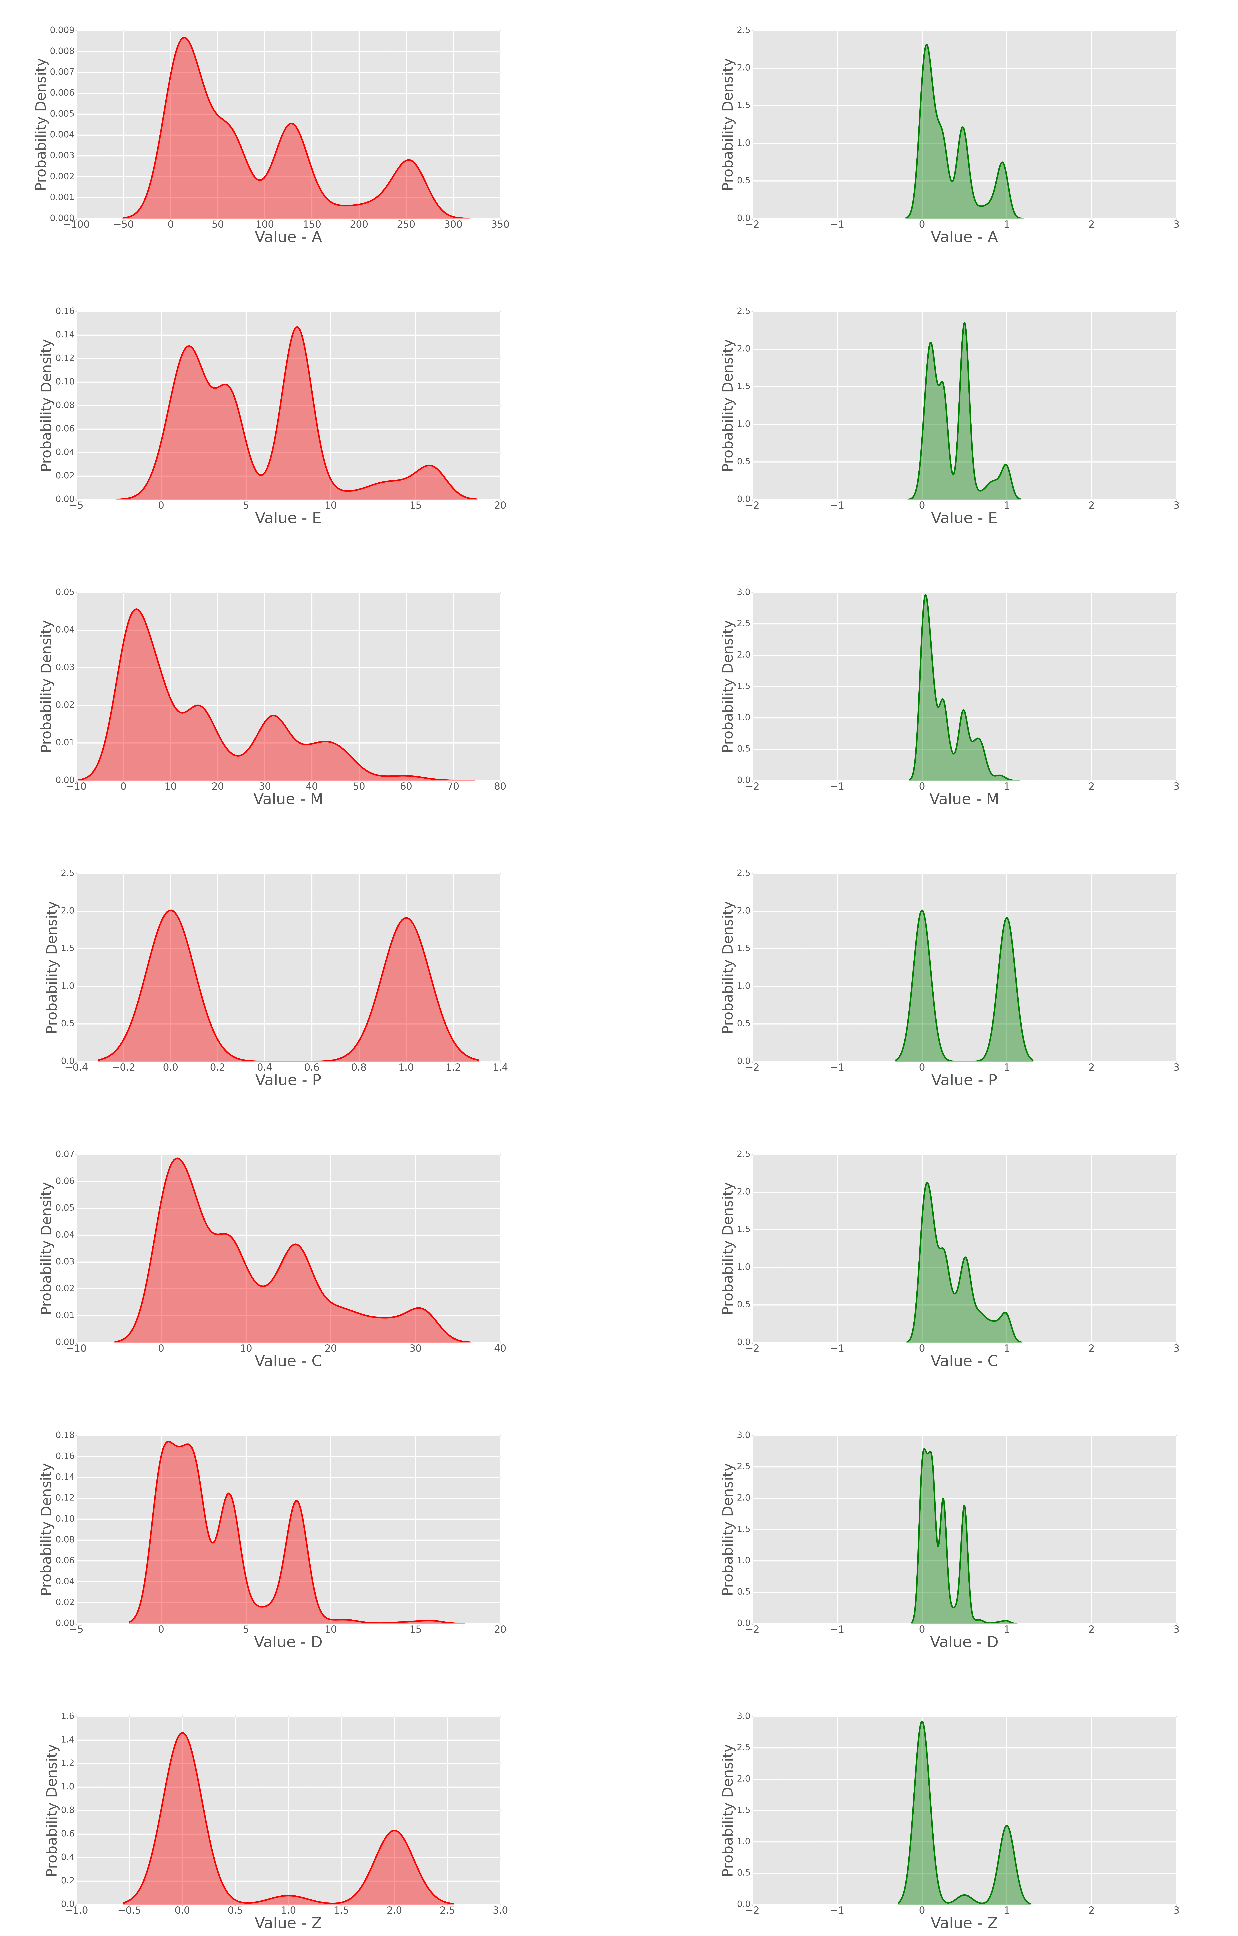

In [10]:
def save_kde_plots(pd_df, cols, color, name, xlims):
    for c in cols:
        plt.style.use('ggplot')
        plt.figure(figsize=(35,15))
        #plt.title('Value - '+c) 
        plt.xlabel('Value - '+c, fontsize=70)
        plt.ylabel('Probability Density', fontsize=65) 
        plt.xticks(fontsize=45, rotation=0)
        plt.yticks(fontsize=40, rotation=0)
        if xlims != None:
          plt.xlim(xlims)


        plt.grid(True, linewidth=5)
        plot=sns.kdeplot(data=pd_df[c],
                         fill=True, 
                         color=color,
                         alpha=.4, 
                         linewidth=7)
        fig_temp=plot.get_figure()
        fig_temp.savefig('./'+name+c+'.png')
        plt.clf()

cols=['A', 'E', 'M', 'P', 'C', 'D', 'Z']
save_kde_plots(df, cols, color='red', name='kde_df', xlims=None)
save_kde_plots(df_scaled, cols, color='green', name='kde_df_scaled', xlims=[-2, 3])

fig, axs = plt.subplots(7,2,figsize=(20,30))  #30 30 is ok
#fig.suptitle('data distribution, before and after scaling')
for i in range(len(cols)):
    axs[i][1].axis('off')
    axs[i][0].axis('off')
    axs[i][1].imshow(plt.imread('./kde_df_scaled'+cols[i]+'.png'))
    axs[i][0].imshow(plt.imread('./kde_df'+cols[i]+'.png'))

## Inference
Notice that the plots to the left are varying wildly in terms of their x-axis range, while the ones to the right are confined between 0 and 1.

